# Sysbench

Let's see what influence other workloads have on Sysbench.

In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

from helpers.load_data import (
    clean_column_names,
    get_data_with_cpu,
    get_experiments_paths,
    trim_experiment,
)
from helpers.regression import (
    draw_regression_graph,
    fit_regression,
)

experiments_path = '../../data'

## Sysbench 12x20min

In [3]:
experiment_name = 'sysbench_1_sysbench_11'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)
df = trim_experiment(df, 12)
df.head()

,cbtool_time,app_latency,app_throughput,app_throughput_inv,cpu,memory,instances_n
0,1606645079,38.07,26.26,0.038081,526.0,1.483560e+10,1.0
1,1606645132,37.07,26.97,0.037078,552.0,1.482346e+10,1.0
2,1606645185,36.87,27.12,0.036873,542.0,1.400541e+10,1.0
3,1606645238,36.69,27.25,0.036697,554.0,1.400915e+10,1.0
4,1606645291,37.12,26.94,0.037120,545.0,1.400294e+10,1.0


### `app_latency` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     2281.
Date:                Fri, 04 Dec 2020   Prob (F-statistic):          1.33e-152
Time:                        13:49:37   Log-Likelihood:                -1281.5
No. Observations:                 341   AIC:                             2567.
Df Residuals:                     339   BIC:                             2575.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      48.3899      1.218     39.742      

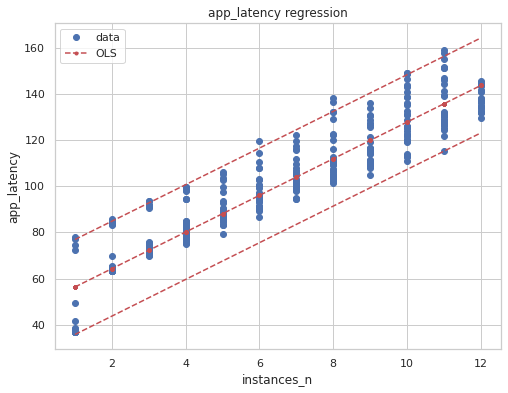

In [4]:
results = fit_regression(data=df, formula='app_latency ~ instances_n')
draw_regression_graph(results, df, metric_name='app_latency', variable='instances_n')
print(results.summary())

## Sysbench 1x20min, Linpack 11x20min

In [5]:
experiment_name = 'sysbench_1_linpack_11'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)
df = trim_experiment(df, 12)
df.head()

,cbtool_time,app_latency,app_throughput,app_throughput_inv,cpu,memory,instances_n
0,1606933526,37.01,27.01,0.037023,540.0,1.578366e+10,1.0
1,1606933579,38.88,25.72,0.038880,536.0,1.445734e+10,1.0
2,1606933632,36.92,27.08,0.036928,580.0,1.445917e+10,1.0
3,1606933684,37.43,26.71,0.037439,547.0,1.446183e+10,1.0
4,1606933737,38.23,26.15,0.038241,566.0,1.444733e+10,1.0


### `app_latency` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.672
Date:                Fri, 04 Dec 2020   Prob (F-statistic):              0.197
Time:                        13:49:54   Log-Likelihood:                -1083.9
No. Observations:                 297   AIC:                             2172.
Df Residuals:                     295   BIC:                             2179.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      40.9558      1.141     35.903      

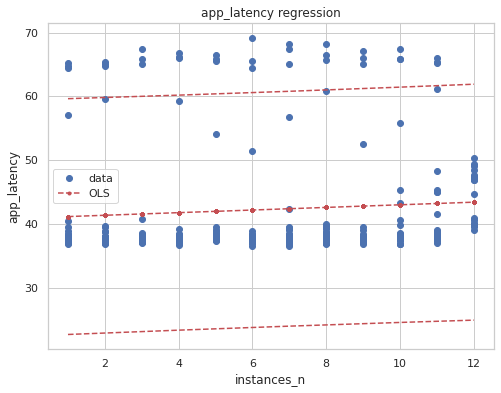

In [6]:
results = fit_regression(data=df, formula='app_latency ~ instances_n')
draw_regression_graph(results, df, metric_name='app_latency', variable='instances_n')
print(results.summary())

## Sysbench 1x20min, Redis YCSB 11x20min

In [9]:
experiment_name = 'sysbench_1_redis_ycsb_11'
path = list(get_experiments_paths(experiment_name, experiments_path))[0]
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)
df = trim_experiment(df, 12)
df.head()

,cbtool_time,app_latency,app_throughput,app_throughput_inv,cpu,memory,instances_n
0,1606951547,37.53,26.64,0.037538,532.0,1.535359e+10,1.0
1,1606951600,37.63,26.56,0.037651,546.0,1.454372e+10,1.0
2,1606951653,37.45,26.70,0.037453,537.0,1.454880e+10,1.0
3,1606951706,36.84,27.14,0.036846,552.0,1.448052e+10,1.0
4,1606951759,36.71,27.24,0.036711,602.0,1.448057e+10,1.0


### `app_latency` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1153
Date:                Fri, 04 Dec 2020   Prob (F-statistic):              0.734
Time:                        13:51:08   Log-Likelihood:                -1280.1
No. Observations:                 319   AIC:                             2564.
Df Residuals:                     317   BIC:                             2572.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      43.9175      1.599     27.460      

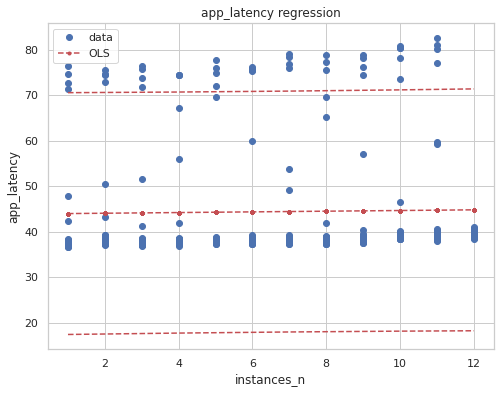

In [10]:
results = fit_regression(data=df, formula='app_latency ~ instances_n')
draw_regression_graph(results, df, metric_name='app_latency', variable='instances_n')
print(results.summary())

## Sysbench 1x20min, Hadoop 5x20min

In [11]:
experiment_name = 'sysbench_1_hadoop_9'
path = list(get_experiments_paths(experiment_name, experiments_path))[0]
df = get_data_with_cpu(path, instances_n=10, cpu_window=30)
df.head()

,cbtool_time,app_latency,app_throughput,app_throughput_inv,cpu,memory,instances_n
0,1606970160,37.71,26.51,0.037722,557.0,1.515487e+10,1.0
1,1606970213,37.93,26.36,0.037936,542.0,1.515316e+10,1.0
2,1606970266,37.87,26.40,0.037879,529.0,1.515460e+10,1.0
3,1606970319,37.66,26.55,0.037665,572.0,1.452880e+10,1.0
4,1606970372,37.80,26.45,0.037807,556.0,1.452247e+10,1.0


### `app_latency` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     85.79
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           1.19e-18
Time:                        13:51:21   Log-Likelihood:                -2052.1
No. Observations:                 407   AIC:                             4108.
Df Residuals:                     405   BIC:                             4116.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      44.0357      4.126     10.672      

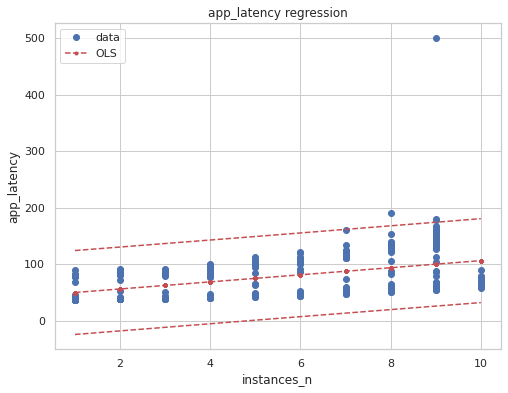

In [12]:
results = fit_regression(data=df, formula='app_latency ~ instances_n')
draw_regression_graph(results, df, metric_name='app_latency', variable='instances_n')
print(results.summary())